
... ***CURRENTLY UNDER DEVELOPMENT*** ...



## Database and Site

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
import sys

# for user inputs
import tkinter as tk
from tkinter import filedialog
from tkinter import simpledialog

# for input configuration
import sys
sys.path.append('../../..')  # Appending parent directory to Python path
from input_configuration import *

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit 
from teslakit.database import Database


In [2]:
# Teslakit database

p_data = p_data_input
db = Database(p_data)

# make a new site
db.MakeNewSite(site_name)


Teslakit Site already exists at C:/Users/fergusonpc/Teslakit-SF-Final\sites\SF_Test5


## After generating the new site, place the input files into the respective subfolders, as shown below:
| Input File                       | Path                                                      |
|----------------------------------|-----------------------------------------------------------|
| MJO_hist.nc                      | sites/site_name/MJO/MJO_hist.nc                           |
| TCs_noaa.nc                      | sites/site_name/TCs/TCs_noaa.nc                           |
| SST_hist.nc                      | sites/site_name/SST/SST_hist.nc                           |
| WAVES_partitions.nc              | sites/site_name/WAVES/WAVES_partitions.nc                 |
| ESTELA_coastmat.mat              | sites/site_name/ESTELA/ESTELA_coastmat.mat                |
| ESTELA_estelamat.mat             | sites/site_name/ESTELA/ESTELA_estelamat.mat               |
| ESTELA_slp.nc                    | sites/site_name/ESTELA/ESTELA_slp.nc                      |
| TIDE_gauge.nc                    | sites/site_name/TIDE/TIDE_gauge.nc                        |
| TIDE_hist.nc                     | sites/site_name/TIDE/TIDE_hist.nc                         |
| EXTRA_VARS_SeaLevelPressure.nc   | sites/site_name/EXTRA_VARS/EXTRA_VARS_SeaLevelPressure.nc |
| EXTRA_VARS_StormSurge.nc         | sites/site_name/EXTRA_VARS/EXTRA_VARS_StormSurge.nc       |
| EXTRA_VARS_Wind.nc               | sites/site_name/EXTRA_VARS/EXTRA_VARS_Wind.nc             |
| EXTRA_VARS_Wind_U.nc             | sites/site_name/EXTRA_VARS/EXTRA_VARS_Wind_U.nc           |
| EXTRA_VARS_Wind_V.nc             | sites/site_name/EXTRA_VARS/EXTRA_VARS_Wind_V.nc           |

In [3]:
# --------------------------------------
# Manually set required input files for teslakit execution, SF examples described below:
#
# MJO.hist                = MJO_hist.nc  # historical MJO (http://www.bom.gov.au/climate/mjo/graphics/rmm.74toRealtime.txt)
#
# TCs.noaa                = IBTrACS.ALL.v04r00.nc (ftp://eclipse.ncdc.noaa.gov/pub/ibtracs/v03r10/wmo/netcdf/)
# Note: Not consider TCs for SF in this project
#
# SST.hist_pacific        = SST_1854_2020_Pacific.nc (Sea Surface Temperature at Pacific area, ERSSTv4)
# 
# WAVES.partitions        = waves_partitions.nc (waves partitions, from GOW database)
# Note: Partitions (GOW) + Bulks (Hs, Tp, Dir calculated using ROI's nb9) at slightly different locations
#
# ESTELA.coastmat         = Costa.mat (ESTELA coast)
# ESTELA.estelamat        = SF_obj.mat (ESTELA data)
# ESTELA.slp              = SLP.nc (Sea Level Pressure, extracted from CFSR)
#
# TIDE.gauge              = h551a.nc (tide gauge)
# TIDE.hist_astro         = tide_astro_hist.nc (astronomical historical tide)

# check input files
db.CheckInputFiles()

# if all input files are available then start with the project notebooks


+-------------------------------+-----------+----------------------------------------------------------+
| database ID                   | available | site path                                                |
+-------------------------------+-----------+----------------------------------------------------------+
| MJO.hist                      | True      | sites\SF_Test5\MJO\MJO_hist.nc                           |
| TCs.noaa                      | True      | sites\SF_Test5\TCs\TCs_noaa.nc                           |
| SST.hist_pacific              | True      | sites\SF_Test5\SST\SST_hist.nc                           |
| WAVES.partitions              | True      | sites\SF_Test5\WAVES\WAVES_partitions.nc                 |
| ESTELA.coastmat               | True      | sites\SF_Test5\ESTELA\ESTELA_coastmat.mat                |
| ESTELA.estelamat              | True      | sites\SF_Test5\ESTELA\ESTELA_estelamat.mat               |
| ESTELA.slp                    | True      | sites\SF_

Successfull Connection Example:

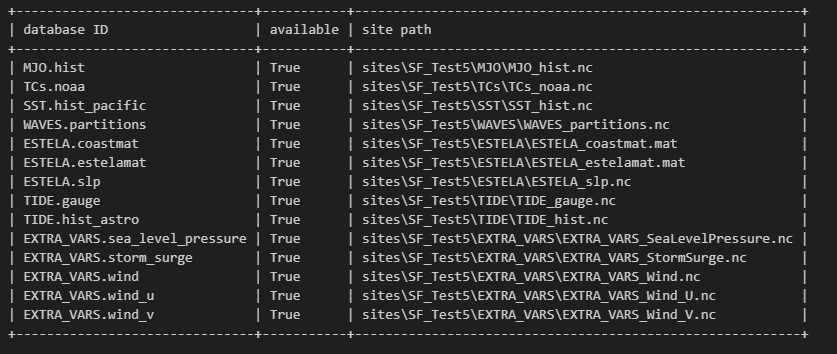


## Check input files format

A template of each input file is shown next. While preparing a new site, adjusting databases to theese templates will ease integration with current Teslakit notebooks

In [4]:
# MJO.hist

data = db.Load_MJO_hist()
print(data)

template = '''
<xarray.Dataset>
Dimensions:  (time: 14343)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-04-08
Data variables:
    phase    (time) int64 ...
    rmm1     (time) float64 ...
    rmm2     (time) float64 ...
    mjo      (time) float64 ...
'''

<xarray.Dataset>
Dimensions:  (time: 15191)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-08-03
Data variables:
    mjo      (time) float64 ...
    phase    (time) int64 ...
    rmm1     (time) float64 ...
    rmm2     (time) float64 ...


In [5]:
# TCs.noaa

data = db.Load_TCs_noaa()
print(data)

template = '''
<xarray.Dataset>
Dimensions:          (center: 26, storm: 7367, time: 137)
Dimensions without coordinates: center, storm, time
Data variables:
    storm_sn         (storm) |S13 ...
    name             (storm) |S57 ...
    numObs           (storm) int16 ...
    season           (storm) int16 ...
    track_type       (storm) int8 ...
    genesis_basin    (storm) int8 ...
    num_basins       (storm) int8 ...
    basin            (storm, time) float32 ...
    wind_avg_period  (center) float32 ...
    source           (center) |S10 ...
    time_wmo         (storm, time) datetime64[ns] ...
    lat_wmo          (storm, time) float32 ...
    lon_wmo          (storm, time) float32 ...
    alt              (storm, time) float32 ...
    wind_wmo         (storm, time) float32 ...
    pres_wmo         (storm, time) float32 ...
    sub_basin        (storm, time) float32 ...
    nature_wmo       (storm, time) float32 ...
    source_wmo       (storm, time) float32 ...
    dist2land        (storm, time) float32 ...
    landfall         (storm, time) float32 ...
Attributes:
    Title:                IBTrACS-WMO: NetCDF reformat
    Version:              v03r10
    Description:          IBTrACS-WMO data reformatted to contain \nall data ...
    cdm_datatype:         Trajectory
    trajectoryDimension:  storm
    Conventions:          CF-1.0
    metadata_link:        gov.noaa.ncdc:C00834
'''

<xarray.Dataset>
Dimensions:           (date_time: 360, quadrant: 4, storm: 13407)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: date_time, quadrant, storm
Data variables:
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    name              (storm) |S128 ...
    source_usa        (storm) |S128 ...
    source_jma        (storm) |S128 ...
    source_cma        (storm) |S128 ...
    source_hko        (storm) |S128 ...
    source_new        (storm) |S128 ...
    source_reu        (storm) |S128 ...
    source_bom        (storm) |S128 ...
    source_nad        (storm) |S128 ...
    source_wel        (storm) |S128 ...
  

In [6]:
# SST.hist_pacific

data = db.Load_SST()  
print(data)

template = '''
<xarray.Dataset>
Dimensions:     (latitude: 5, longitude: 81, time: 1961)
Coordinates:
  * latitude    (latitude) float32 4.0 2.0 0.0 -2.0 -4.0
  * longitude   (longitude) float32 120.0 122.0 124.0 ... 276.0 278.0 280.0
  * time        (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2017-05-01
Data variables:
    SST         (longitude, latitude, time) float64 ...
    SST_runavg  (longitude, latitude, time) float64 ...
'''

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 81, time: 1999)
Coordinates:
  * latitude   (latitude) float64 -4.0 -2.0 0.0 2.0 4.0
  * longitude  (longitude) float64 120.0 122.0 124.0 126.0 ... 276.0 278.0 280.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-07-01
Data variables:
    sst        (longitude, latitude, time) float64 ...
    ssta       (longitude, latitude, time) float64 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   https://doi.org/10.7289/V5T72FNM
    dataset_doi:                     https://doi.org/10.7289/V5T72FNM
    id:                              ersst.v5
    naming_authority:                gov.noaa.ncei
    title:                           NOAA ERSSTv5 (in situ only)
    summary:                         ERSSTv5 is developped based on v4 and by...
    dataset_citation_product:        NOAA ERSSTv5
    dataset_citation_version:        ERSSTv5
    dataset_citation_institution:

In [7]:
# WAVES.partitions

data = db.Load_WAVES_partitions() 
print(data)

template = '''
<xarray.Dataset>
Dimensions:       (direction: 24, frequency: 29, string16: 16, time: 364266)
Coordinates:
    station       int32 ...
  * frequency     (frequency) float32 0.035 0.0385 ... 0.45885003 0.50473505
  * direction     (direction) float32 82.5 67.5 52.5 37.5 ... 127.5 112.5 97.5
  * string16      (string16) int32 -2147483647 -2147483647 ... -2147483647
  * time          (time) datetime64[ns] 1979-01-01 ... 2020-07-01
Data variables:
    station_name  (time) |S64 ...
    frequency1    (time, frequency) float32 ...
    frequency2    (time, frequency) float32 ...
    longitude     (time) float32 ...
    latitude      (time) float32 ...
    Efth          (time, frequency, direction) float32 ...
    depth         (time) float32 ...
    u10m          (time) float32 ...
    udir          (time) float32 ...
    curr          (time) float32 ...
    currdir       (time) float32 ...
Attributes:
    product_name:                    ww3.197901_spec.nc
    area:                            spectral resolution for points
    data_type:                       OCO spectra 2D
    format_version:                  1.1
    southernmost_latitude:           -70.0000000°
    northernmost_latitude:           71.5999985°
    latitude_resolution:             n/a
    westernmost_longitude:           -178.0000000°
    easternmost_longitude:           350.0000000°
    longitude_resolution:            n/a
    minimum_altitude:                n/a
    maximum_altitude:                n/a
    altitude_resolution:             n/a
    start_date:                      1979-01-01T00:00:00Z
    stop_date:                       1979-02-01T00:00:00Z
    field_type:                      hourly
    date_created:                    2012-09-10T21:32:00Z
    author:                          Durrant, Hemer, Trenham and Greenslade
    contact:                         Mark.Hemer@csiro.au,T.Durrant@bom.gov.au
    DOI:                             http://dx.doi.org/10.4225/08/523168703DCC5
    related_materials:               Centre for Australian Weather and Climat...
    creation_method:                 The hindcast was performed using the WAV...
    license:                         Please note that the licensee is require...
    DODS.strlen:                     16
    DODS.dimName:                    string16
    DODS_EXTRA.Unlimited_Dimension:  time
'''

<xarray.Dataset>
Dimensions:    (time: 350640)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    longitude  (time) float64 ...
    latitude   (time) float64 ...
    MAPSTA     (time) int64 ...
    hs         (time) float64 ...
    dir        (time) float64 ...
    hs0        (time) float64 ...
    hs1        (time) float64 ...
    hs2        (time) float64 ...
    hs3        (time) float64 ...
    tp0        (time) float64 ...
    tp1        (time) float64 ...
    tp2        (time) float64 ...
    tp3        (time) float64 ...
    th0        (time) float64 ...
    th1        (time) float64 ...
    th2        (time) float64 ...
    th3        (time) float64 ...
    tp         (time) float64 ...


In [8]:
# ESTELA.estelamat

data = db.Load_ESTELA_data()  
print(data)

template = '''
<xarray.Dataset>
Dimensions:              (latitude: 317, longitude: 720)
Coordinates:
  * longitude            (longitude) float64 180.0 180.5 181.0 ... 179.0 179.5
  * latitude             (latitude) float64 -78.0 -77.5 -77.0 ... 79.0 79.5 80.0
Data variables:
    mask_land            (latitude, longitude) float64 nan nan nan ... nan nan
    mask_shadow          (latitude, longitude) float64 nan nan nan ... nan nan
    mask_e95             (latitude, longitude) float64 nan nan nan ... nan nan
    D_DJF                (latitude, longitude) float64 nan nan nan ... nan nan
    F_DJF                (latitude, longitude) float64 nan nan nan ... nan nan
    Fthreas_DJF          (latitude, longitude) float64 nan nan nan ... nan nan
    D_JJA                (latitude, longitude) float64 nan nan nan ... nan nan
    F_JJA                (latitude, longitude) float64 nan nan nan ... nan nan
    Fthreas_JJA          (latitude, longitude) float64 nan nan nan ... nan nan
    D_MAM                (latitude, longitude) float64 nan nan nan ... nan nan
    F_MAM                (latitude, longitude) float64 nan nan nan ... nan nan
    Fthreas_MAM          (latitude, longitude) float64 nan nan nan ... nan nan
    D_SON                (latitude, longitude) float64 nan nan nan ... nan nan
    F_SON                (latitude, longitude) float64 nan nan nan ... nan nan
    Fthreas_SON          (latitude, longitude) float64 nan nan nan ... nan nan
    D_y1993to2012        (latitude, longitude) float64 nan nan nan ... nan nan
    F_y1993to2012        (latitude, longitude) float64 nan nan nan ... nan nan
    Fthreas_y1993to2012  (latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    pnt_longitude:  [[167.5]]
    pnt_latitude:   [[9.5]]'''

<xarray.Dataset>
Dimensions:              (latitude: 317, longitude: 720)
Coordinates:
  * longitude            (longitude) float64 180.0 180.5 181.0 ... 179.0 179.5
  * latitude             (latitude) float64 -78.0 -77.5 -77.0 ... 79.0 79.5 80.0
Data variables:
    mask_land            (latitude, longitude) float64 nan nan nan ... nan nan
    mask_shadow          (latitude, longitude) float64 nan nan nan ... nan nan
    mask_e95             (latitude, longitude) float64 nan nan nan ... nan nan
    D_DJF                (latitude, longitude) float64 nan nan nan ... nan nan
    F_DJF                (latitude, longitude) float64 nan nan nan ... nan nan
    Fthreas_DJF          (latitude, longitude) float64 nan nan nan ... nan nan
    D_JJA                (latitude, longitude) float64 nan nan nan ... nan nan
    F_JJA                (latitude, longitude) float64 nan nan nan ... nan nan
    Fthreas_JJA          (latitude, longitude) float64 nan nan nan ... nan nan
    D_MAM                (

In [9]:
# ESTELA.slp

data = db.Load_ESTELA_SLP()  
print(data)

template='''
<xarray.Dataset>
Dimensions:    (latitude: 31, longitude: 83, time: 333120)
Coordinates:
  * latitude   (latitude) float32 60.5 58.5 56.5 54.5 52.5 ... 6.5 4.5 2.5 0.5
  * longitude  (longitude) float32 115.0 117.0 119.0 121.0 ... 275.0 277.0 279.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2016-12-31T23:00:00.000013056
Data variables:
    SLP        (time, latitude, longitude) float64 ...
'''

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 74, time: 14638)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-01-28
  * latitude   (latitude) float64 0.0 2.0 4.0 6.0 8.0 ... 50.0 52.0 54.0 56.0
  * longitude  (longitude) float64 142.0 144.0 146.0 148.0 ... 284.0 286.0 288.0
Data variables:
    SLP        (time, latitude, longitude) float64 ...
    GRD        (time, latitude, longitude) float64 ...


In [10]:
# TIDE.hist_astro 

data = db.Load_TIDE_hist_astro()
print(data)

template='''
<xarray.Dataset>
Dimensions:     (time: 342357)
Coordinates:
  * time        (time) datetime64[ns] 1975-12-31T12:00:00 ... 2014-02-11T12:00:00
Data variables:
    TIDE        (time) float64 ...
    NTR         (time) float64 ...
    WaterLevel  (time) float64 ...

<xarray.Dataset>
Dimensions:    (time: 184104)
Coordinates:
  * time       (time) datetime64[ns] 1996-01-01 ... 2016-12-31T23:00:00.000002944
Data variables:
    observed   (time) float64 ...
    ntr        (time) float64 ...
    sigma      (time) float64 ...
    predicted  (time) float64 ...
'''

<xarray.Dataset>
Dimensions:      (time: 1073080)
Coordinates:
  * time         (time) datetime64[ns] 1897-08-01T07:59:59.971200 ... 2019-12-31T22:59:59.971200
Data variables:
    WaterLevels  (time) float32 ...
    Residual     (time) float64 ...
    Predicted    (time) float64 ...
Attributes:
    source:   teslakit_v0.9.1


# Input Format Checking for the EXTRA_VARS files is not included in this notebook.